In [1]:
import numpy as np
import pandas as pd
from ISLP import load_data
from ISLP.models import ModelSpec, summarize, poly
import statsmodels.api as sm
from matplotlib.pyplot import subplots
from statsmodels.stats.anova import anova_lm

from statsmodels.stats.outliers_influence \
    import variance_inflation_factor as VIF

In [27]:
dataset = load_data("Boston")
Y = dataset["crim"]
x_columns = dataset.columns.drop(["crim"])
cols_count = len(x_columns)
dataset

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [24]:
results = np.empty(cols_count, dtype=object)

for idx, x_name in enumerate(x_columns):
    X = pd.DataFrame({'intercept': np.ones(dataset.shape[0]),
                      x_name: dataset[x_name]})

    results[idx] = sm.OLS(Y, X).fit()
    print(f"\nY ~ {x_name}")
    print(summarize(results[idx]))
    print("========================")


Y ~ zn
             coef  std err       t  P>|t|
intercept  4.4537    0.417  10.675    0.0
zn        -0.0739    0.016  -4.594    0.0

Y ~ indus
             coef  std err      t  P>|t|
intercept -2.0637    0.667 -3.093  0.002
indus      0.5098    0.051  9.991  0.000

Y ~ chas
             coef  std err      t  P>|t|
intercept  3.7444    0.396  9.453  0.000
chas      -1.8928    1.506 -1.257  0.209

Y ~ nox
              coef  std err       t  P>|t|
intercept -13.7199    1.699  -8.073    0.0
nox        31.2485    2.999  10.419    0.0

Y ~ rm
              coef  std err      t  P>|t|
intercept  20.4818    3.364  6.088    0.0
rm         -2.6841    0.532 -5.045    0.0

Y ~ age
             coef  std err      t  P>|t|
intercept -3.7779    0.944 -4.002    0.0
age        0.1078    0.013  8.463    0.0

Y ~ dis
             coef  std err       t  P>|t|
intercept  9.4993    0.730  13.006    0.0
dis       -1.5509    0.168  -9.213    0.0

Y ~ rad
             coef  std err       t  P>|t|
intercept

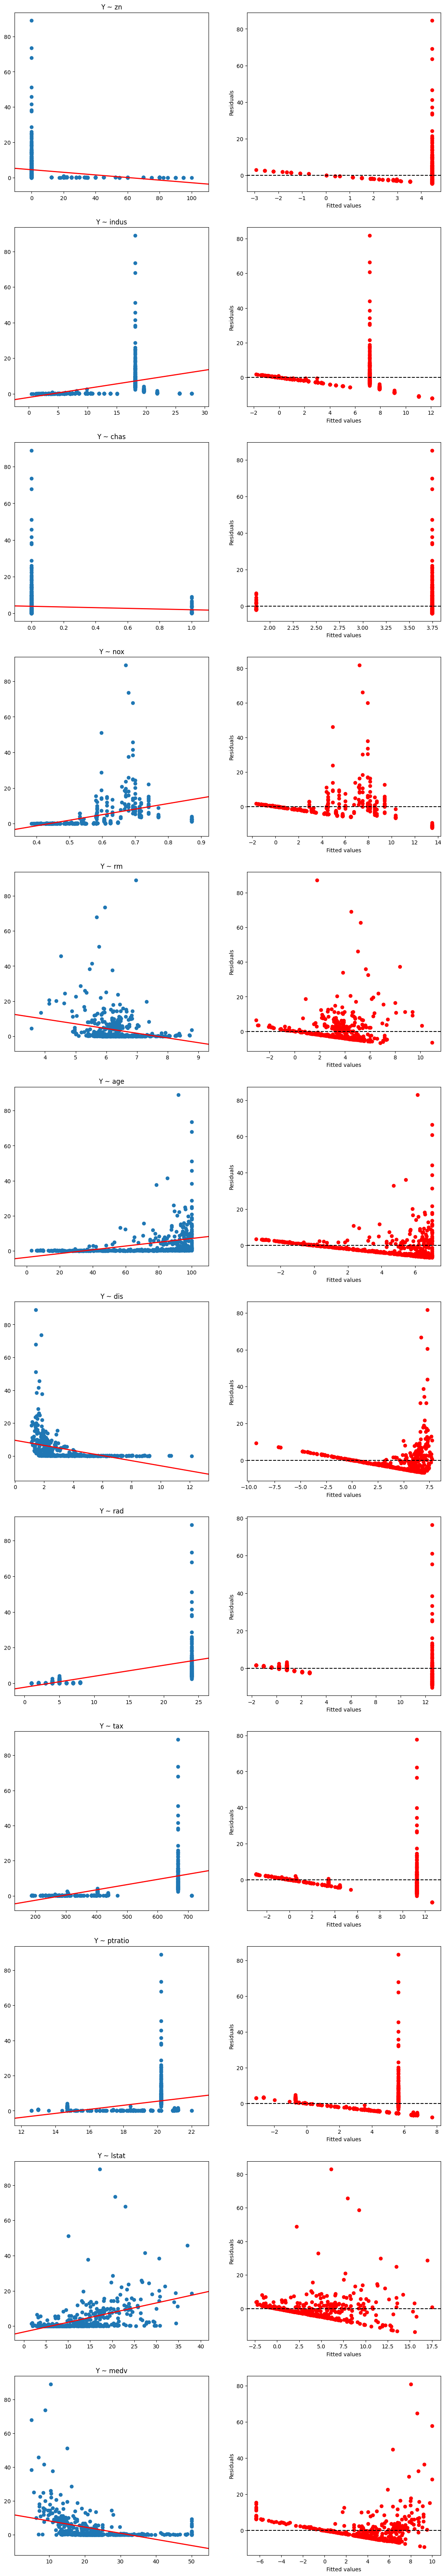

In [42]:
axs = subplots(cols_count, 2, figsize=(7*2,7*cols_count))[1]

for idx in range(cols_count):
    ax = axs[idx, 0]
    X = dataset[x_columns[idx]]
    ax.scatter(X, Y)
    ax.set_title(f"Y ~ {x_columns[idx]}")

    result = results[idx]
    b0 = result.params.iloc[0]
    b1 = result.params.iloc[1]
    xlim = ax.get_xlim()
    ylim = [b0 + b1*xlim[0], b0 + b1*xlim[1]]
    ax.axline((xlim[0], ylim[0]), (xlim[1], ylim[1]), color='r', ls="-", linewidth=2)

    ax = axs[idx, 1]
    ax.scatter(result.fittedvalues, result.resid, c="r")
    ax.axhline(0, c="k", ls="--")
    ax.set_xlabel("Fitted values")
    ax.set_ylabel("Residuals")

